## Data Exploration

1. Import Required Libraries and Load the Dataset


In [1]:
!pip install ucimlrepo

## Import libraries

import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:


# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets
# Combine features (X) and target (y) into one DataFrame
df = X.copy()
df['y'] = y


# variable information
print(bank_marketing.variables.to_string())


           name     role         type      demographic                                                                                                                                                                                                                                                                                                                                                                                                           description  units missing_values
0           age  Feature      Integer              Age                                                                                                                                                                                                                                                                                                                                                                                                                  None   None             no
1           job  Feature  Categori

In [8]:

# Inspect features

print(X.shape)

# Inspect target

print(y.shape)


#categorical columns
categorical_columns=X.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

#numerical columns
numerical_columns=X.select_dtypes(include=['int64']).columns.tolist()
print(numerical_columns)


(45211, 16)
(45211, 1)
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']


In [4]:
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  


##Missing Value Identification##

In [4]:


##checking missing value percentages
def missing_values_summarizer(df):
        mis_val=df.isnull().sum()
        mis_val_percentage=100*mis_val/len(df)
        mis_val_table=pd.concat([mis_val,mis_val_percentage],axis=1)
        mis_val_summary=mis_val_table.rename(columns={0:'Missing values',1:'percentage'})

        return mis_val_summary

print(missing_values_summarizer(X))

             Missing values  percentage
age                       0    0.000000
job                     288    0.637013
marital                   0    0.000000
education              1857    4.107407
default                   0    0.000000
balance                   0    0.000000
housing                   0    0.000000
loan                      0    0.000000
contact               13020   28.798301
day_of_week               0    0.000000
month                     0    0.000000
duration                  0    0.000000
campaign                  0    0.000000
pdays                     0    0.000000
previous                  0    0.000000
poutcome              36959   81.747805


In [10]:
def find_missing_value_patterns(df, column):
    """
    Describes data for rows where the specified column has missing values.

    Args:
        df (pd.DataFrame): The DataFrame to analyze.
        column (str): The name of the column to check for missing values.
    """
    mis_val_pattern = df[df[column].isnull()].describe()
    print(f"Missing value patterns for column '{column}':\n", mis_val_pattern)

mis_val_summary = missing_values_summarizer(X)  # Store summary for efficiency

# Iterate over original columns of X, not the summary table's columns
for column in X.columns:
    if mis_val_summary.loc[column, 'percentage'] > 0:  # Access percentage using .loc
        find_missing_value_patterns(X, column)

Missing value patterns for column 'job':
               age       balance  day_of_week     duration    campaign  \
count  288.000000    288.000000   288.000000   288.000000  288.000000   
mean    47.593750   1772.357639    14.642361   237.611111    3.309028   
std     10.775095   2970.288559     8.630261   226.115296    3.788621   
min     25.000000   -295.000000     1.000000     8.000000    1.000000   
25%     41.000000    170.750000     6.000000    87.750000    1.000000   
50%     47.000000    677.000000    14.000000   165.000000    2.000000   
75%     55.000000   2165.500000    20.250000   311.000000    4.000000   
max     82.000000  19706.000000    31.000000  1487.000000   35.000000   

            pdays    previous  
count  288.000000  288.000000  
mean    20.982639    0.319444  
std     75.652767    1.089403  
min     -1.000000    0.000000  
25%     -1.000000    0.000000  
50%     -1.000000    0.000000  
75%     -1.000000    0.000000  
max    683.000000    7.000000  
Missing valu

#Categorical variable Exploration#



##1.Categorical Distribution

In [19]:
def plot_categorical_distribution(data,column):

    if column not in data.columns:
      print(f"column does not exist in the data set")
      return

    #count values
    counts=data[column].value_counts(dropna=False)
    print(f"Distribution of {column}:\n",counts)

    #plot
    plt.figure(figsize=(10,8))
    sns.countplot(data=data,y=column,order=counts.index,palette="pastel")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.title(f"Distribution of {column}")
    plt.show()



Distribution of job:
 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


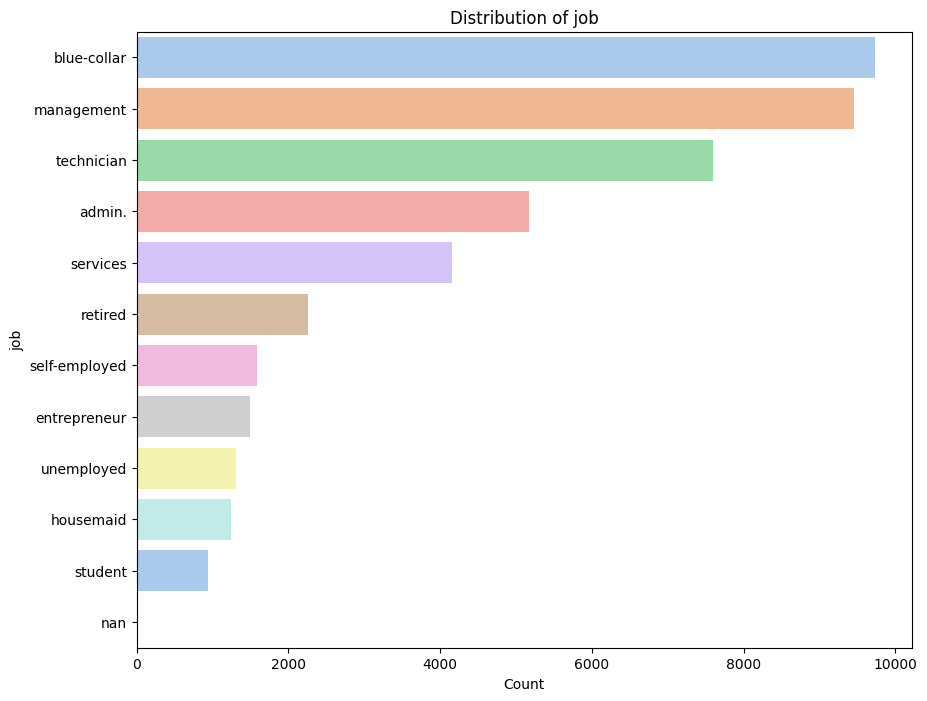

Distribution of marital:
 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


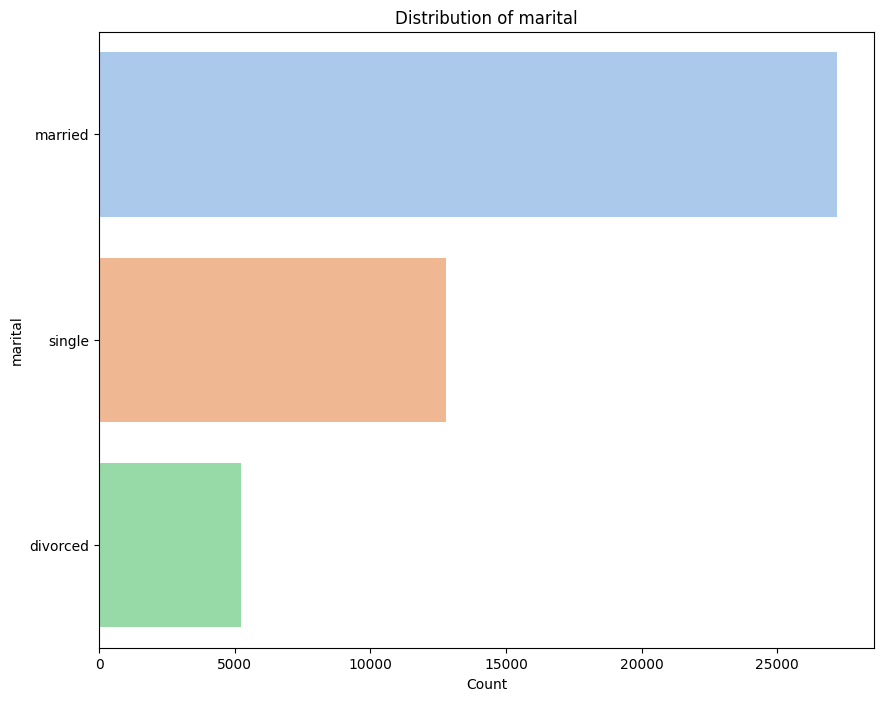

Distribution of education:
 education
secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


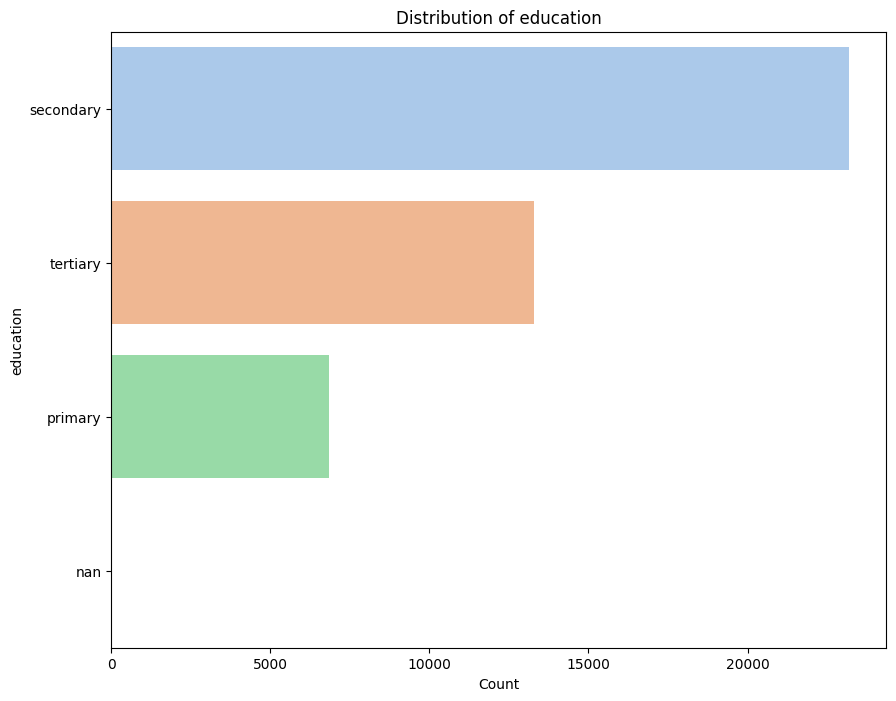

Distribution of default:
 default
no     44396
yes      815
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


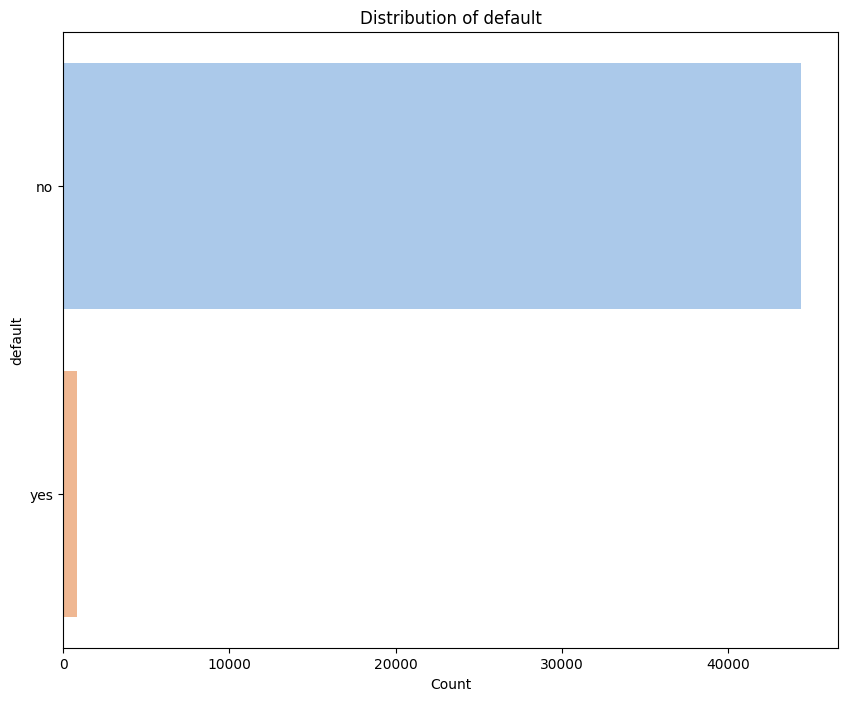

Distribution of housing:
 housing
yes    25130
no     20081
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


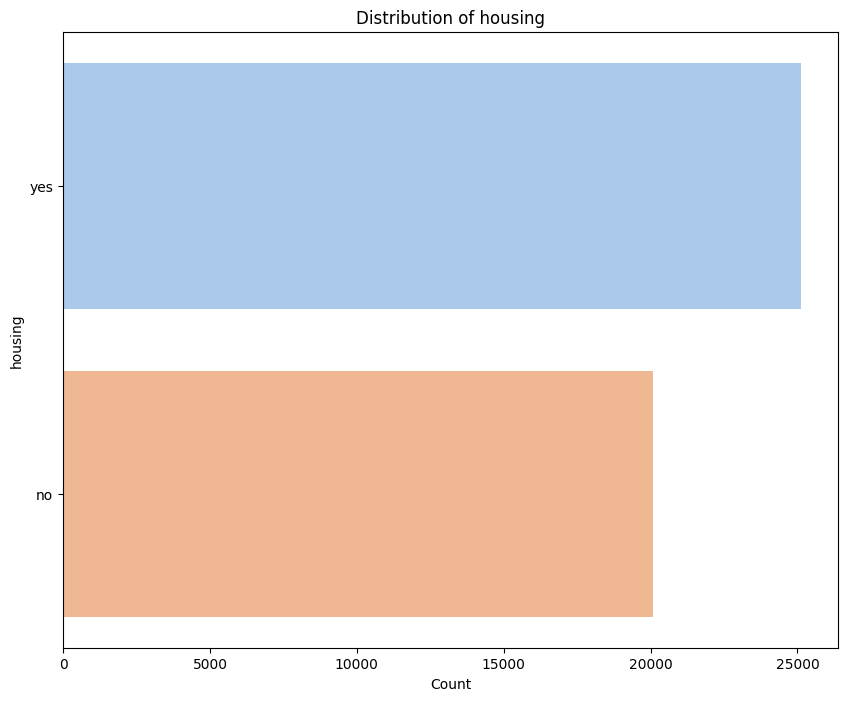

Distribution of loan:
 loan
no     37967
yes     7244
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


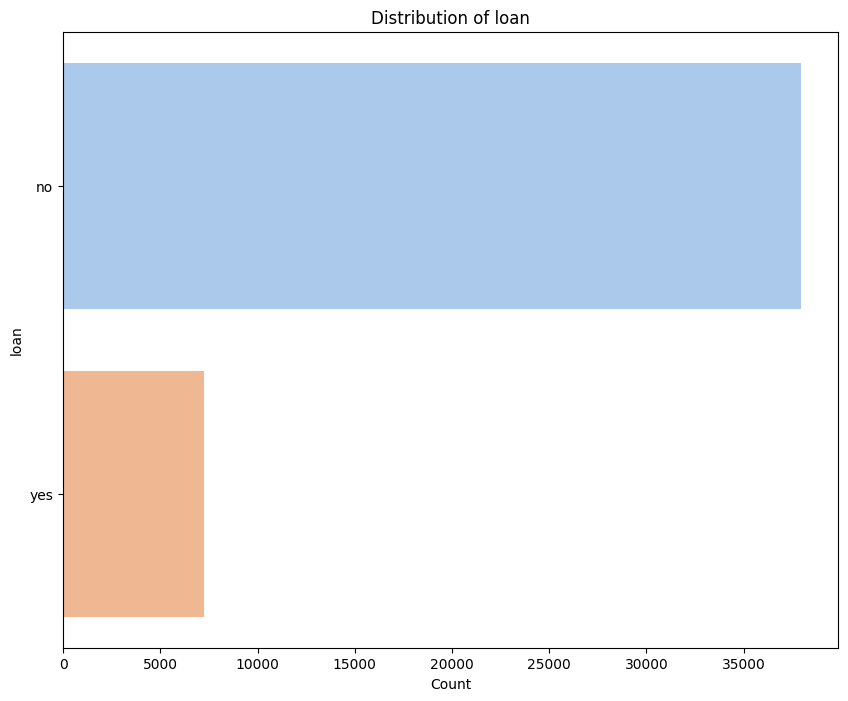

Distribution of contact:
 contact
cellular     29285
NaN          13020
telephone     2906
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


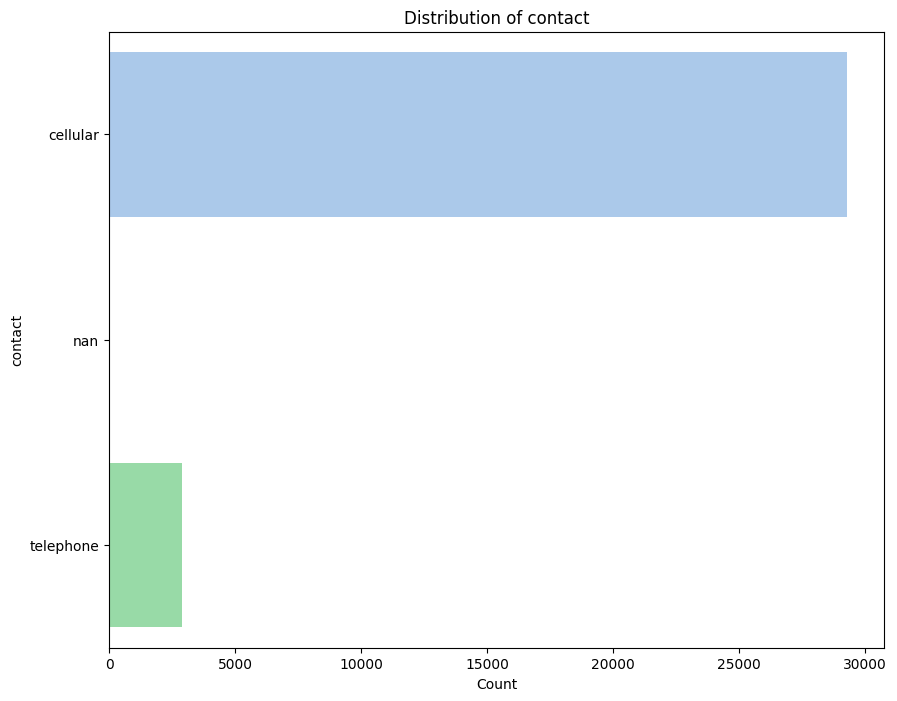

Distribution of month:
 month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


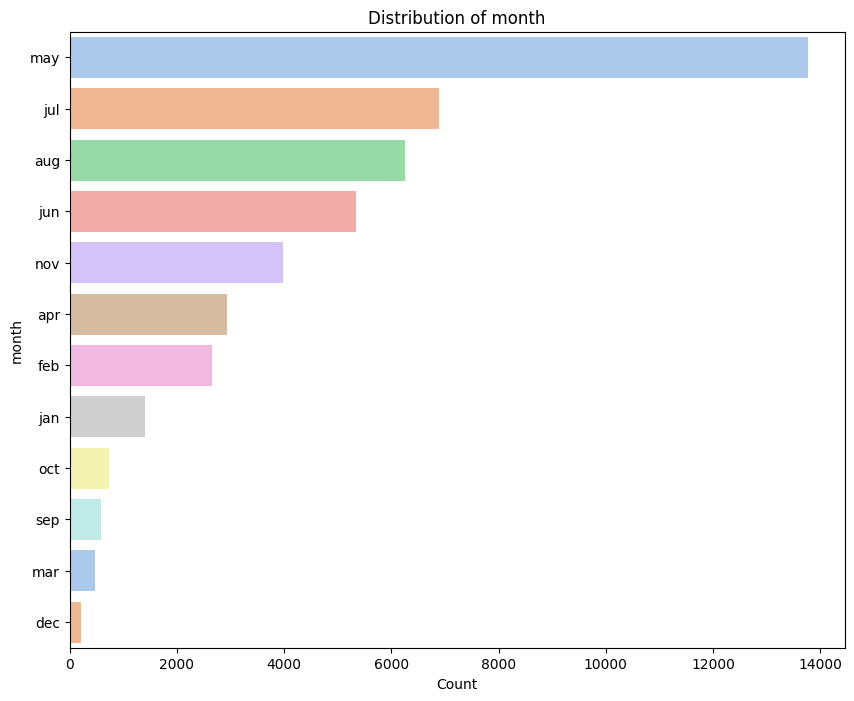

Distribution of poutcome:
 poutcome
NaN        36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


<ipython-input-19-195507e6a067>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,y=column,order=counts.index,palette="pastel")


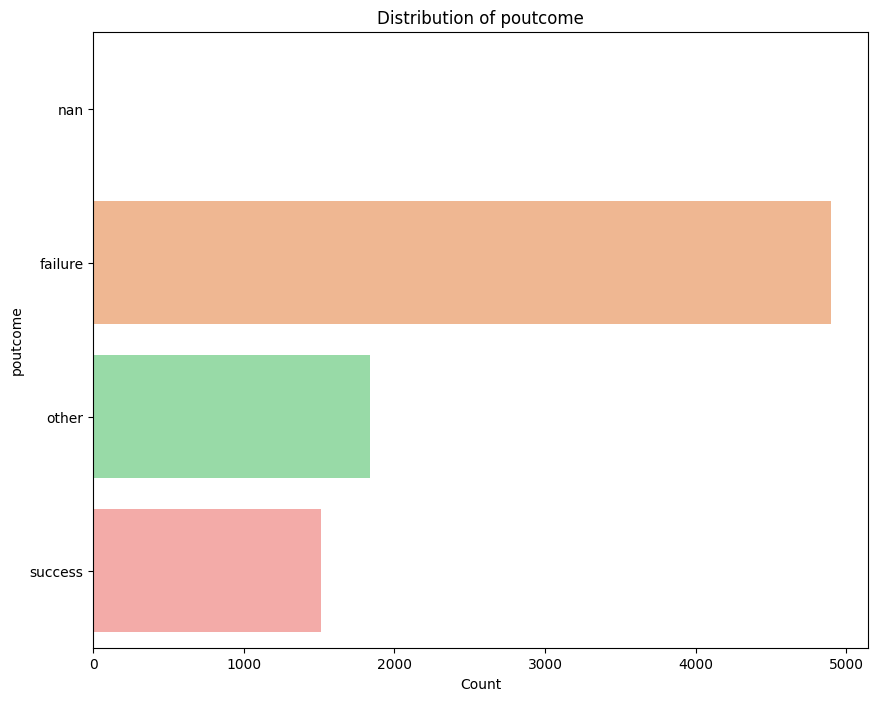

In [20]:



for column in categorical_columns:
  plot_categorical_distribution(X,column)

##2.Identify Rare Categories

In [9]:
def identify_rare_categories(data,column,threshold=0.01):
  """
      Identifies rare categories in a categorical variable

      parameters:
       data: The dataset
       column: The categorical column
       threshold: The threshold for rare category

  """
  #Checking column existence
  if column not in data.columns:
    print(f"The column doesn't exist")

  # calculate frequency of each category

  category_frequency=data[column].value_counts(normalize=True,dropna=False)
  rare_categories=category_frequency[category_frequency<threshold]
  print(f"Rare categories in '{column}':\n",rare_categories)

In [10]:
for column in categorical_columns:
  identify_rare_categories(X,column)

Rare categories in 'job':
 job
NaN    0.00637
Name: proportion, dtype: float64
Rare categories in 'marital':
 Series([], Name: proportion, dtype: float64)
Rare categories in 'education':
 Series([], Name: proportion, dtype: float64)
Rare categories in 'default':
 Series([], Name: proportion, dtype: float64)
Rare categories in 'housing':
 Series([], Name: proportion, dtype: float64)
Rare categories in 'loan':
 Series([], Name: proportion, dtype: float64)
Rare categories in 'contact':
 Series([], Name: proportion, dtype: float64)
Rare categories in 'month':
 month
dec    0.004733
Name: proportion, dtype: float64
Rare categories in 'poutcome':
 Series([], Name: proportion, dtype: float64)


##3.Relationship with target variable

In [10]:
def plot_relation_with_target(data,column,target):

  """
  Analyzes abd visualize relationship between a categorical varibale and target variable

  Parameters:
      data: Tne dataset
      column: The categorical column
      target: The target column
  """
  # Checking existence of both columns in the data set

  if column not in data.columns or target not in data.columns:
    print(f"Column does not exist in the data set")
    return

  #cross tabulation

  crosstab=pd.crosstab(data[column],data[target],normalize='index',dropna=False)
  print(f"Cross tabulation of '{column}' and '{target}':\n",crosstab)

  #plot

  crosstab.plot(kind='bar',stacked=True,figsize=(10,8))
  plt.title(f"Relationship between {column} and {target}")
  plt.xlabel(column)
  plt.ylabel("Proportion")
  plt.legend(title=target,loc='upper right')
  plt.show()


Cross tabulation of 'job' and 'y':
 y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
NaN            0.881944  0.118056


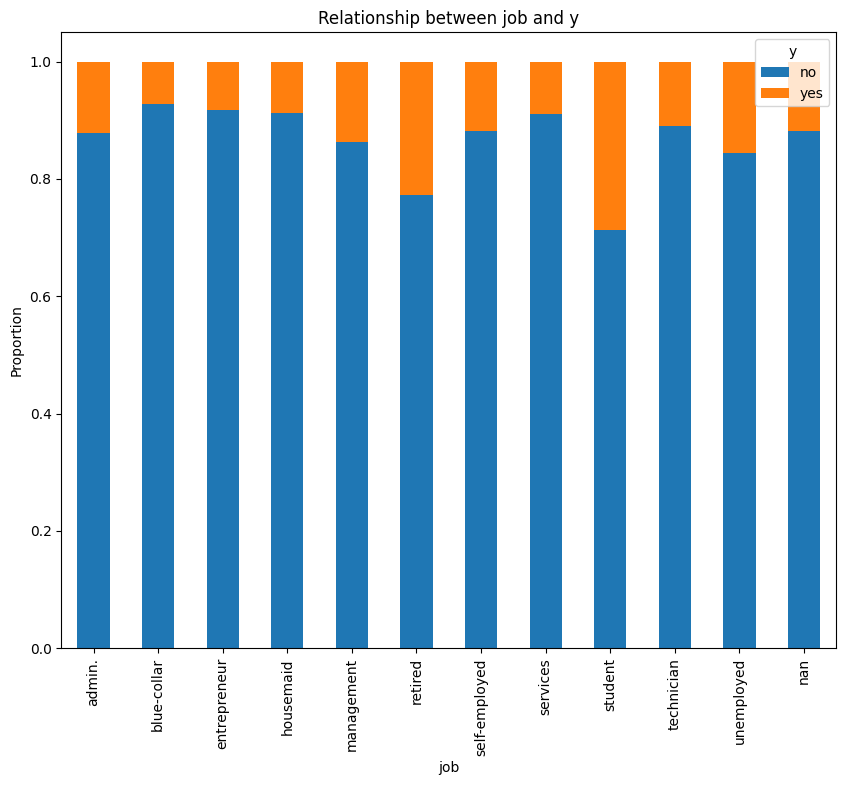

Cross tabulation of 'marital' and 'y':
 y               no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492


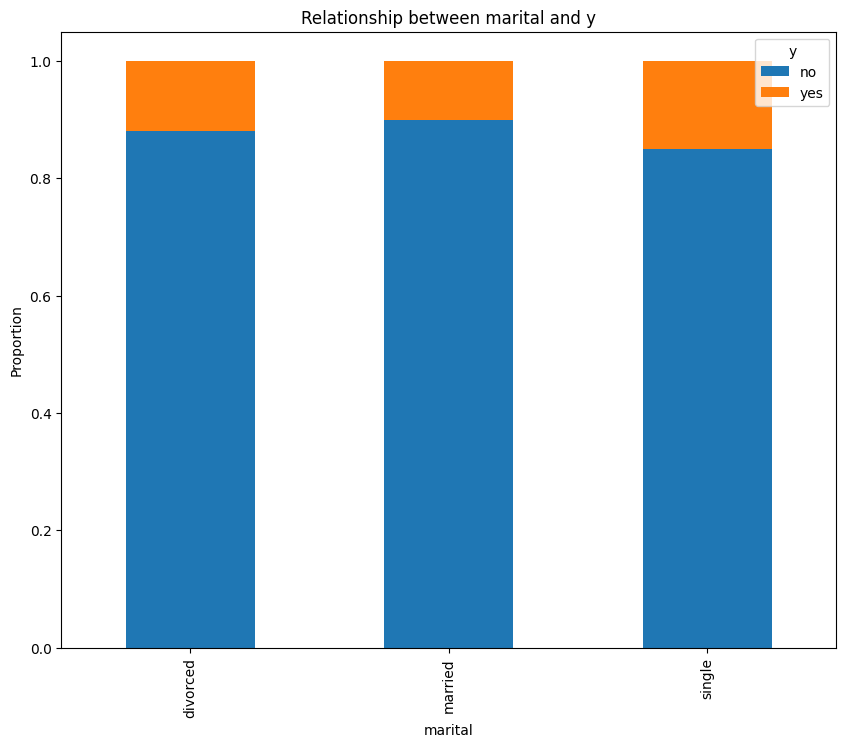

Cross tabulation of 'education' and 'y':
 y                no       yes
education                    
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064
NaN        0.864297  0.135703


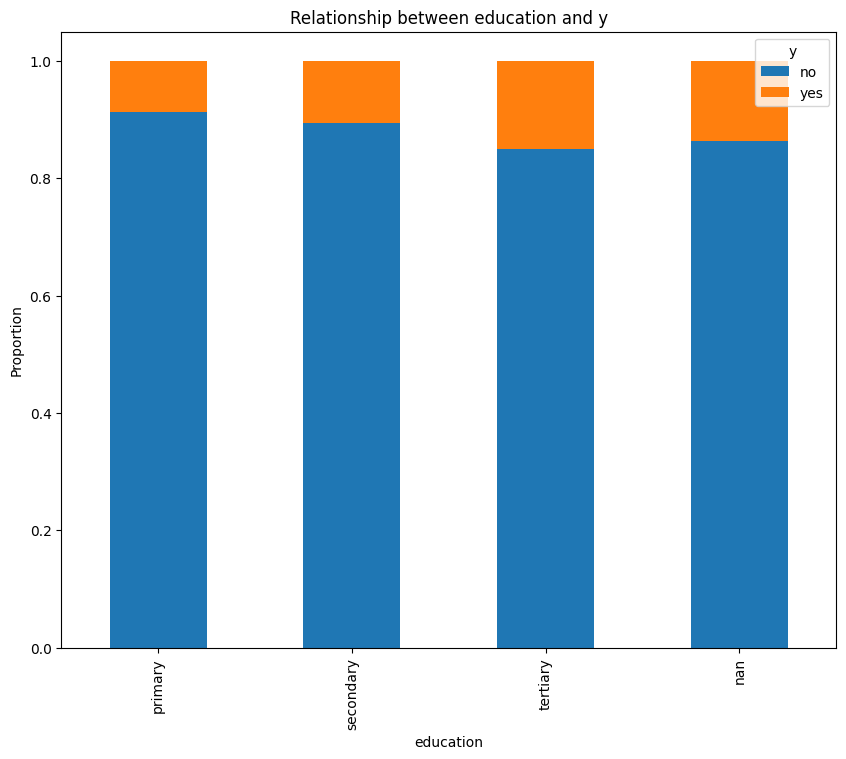

Cross tabulation of 'default' and 'y':
 y              no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804


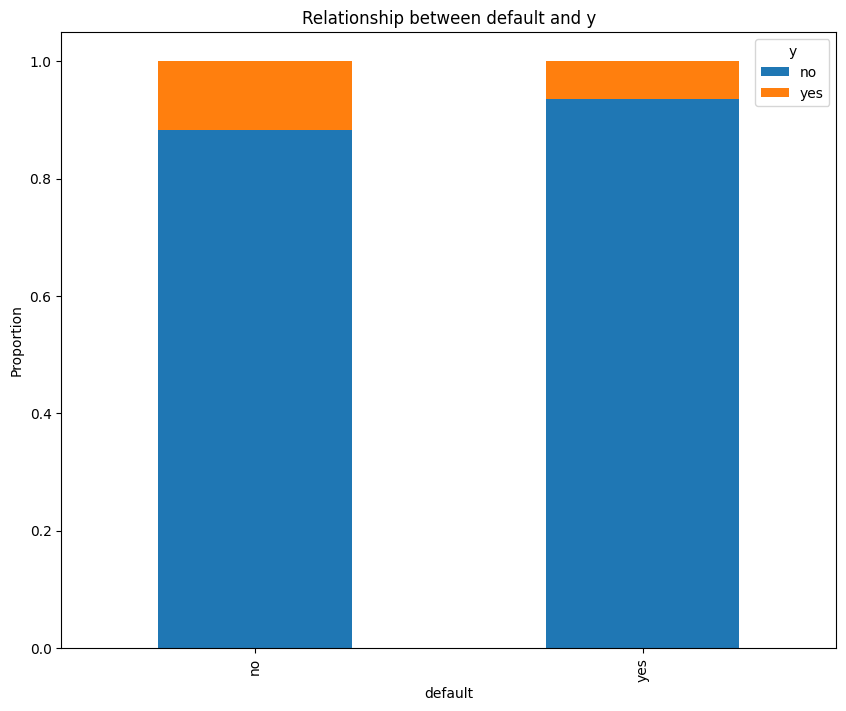

Cross tabulation of 'housing' and 'y':
 y              no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000


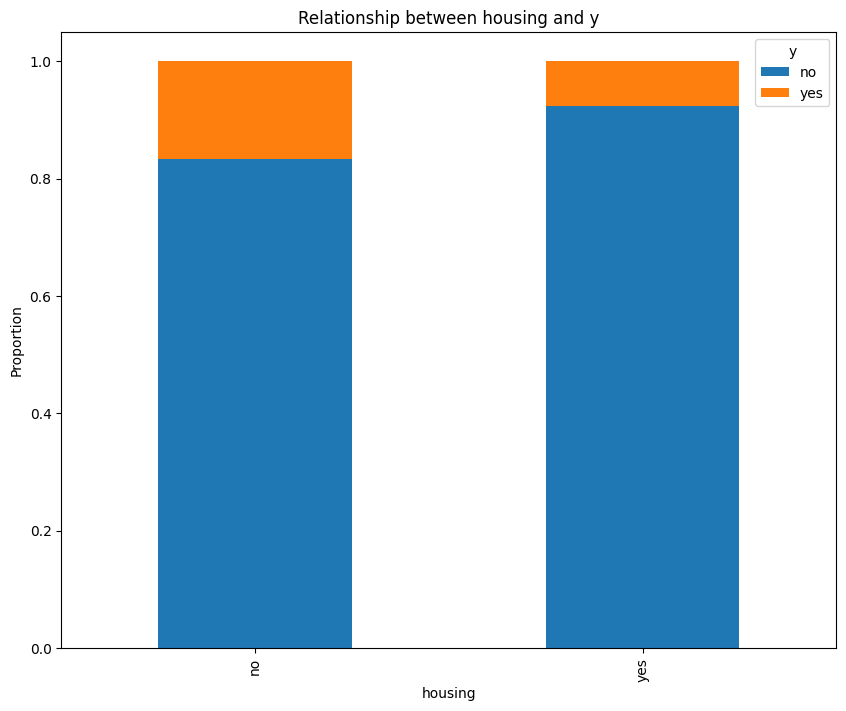

Cross tabulation of 'loan' and 'y':
 y           no       yes
loan                    
no    0.873443  0.126557
yes   0.933186  0.066814


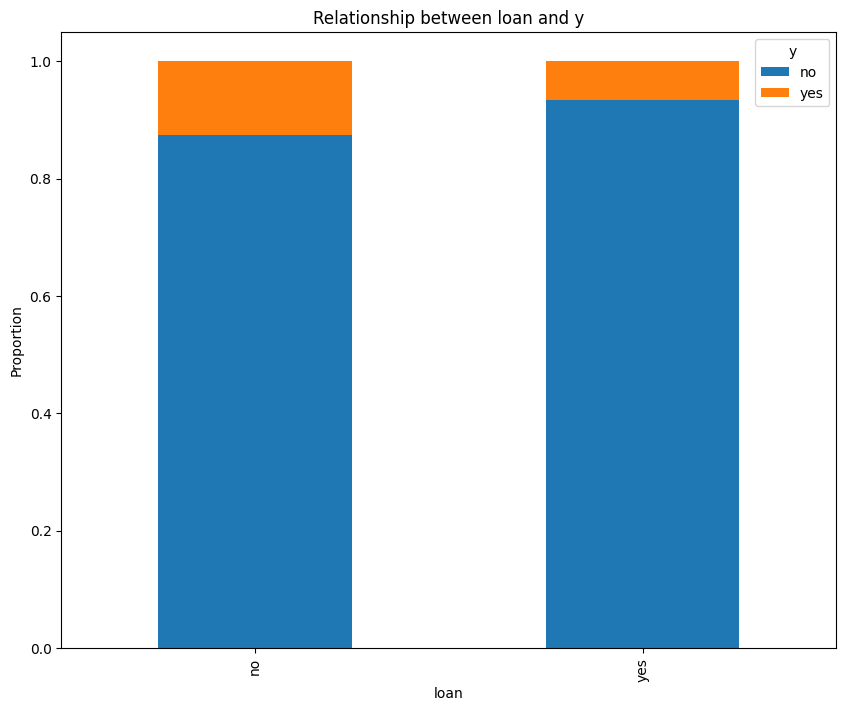

Cross tabulation of 'contact' and 'y':
 y                no       yes
contact                      
cellular   0.850811  0.149189
telephone  0.865795  0.134205
NaN        0.959293  0.040707


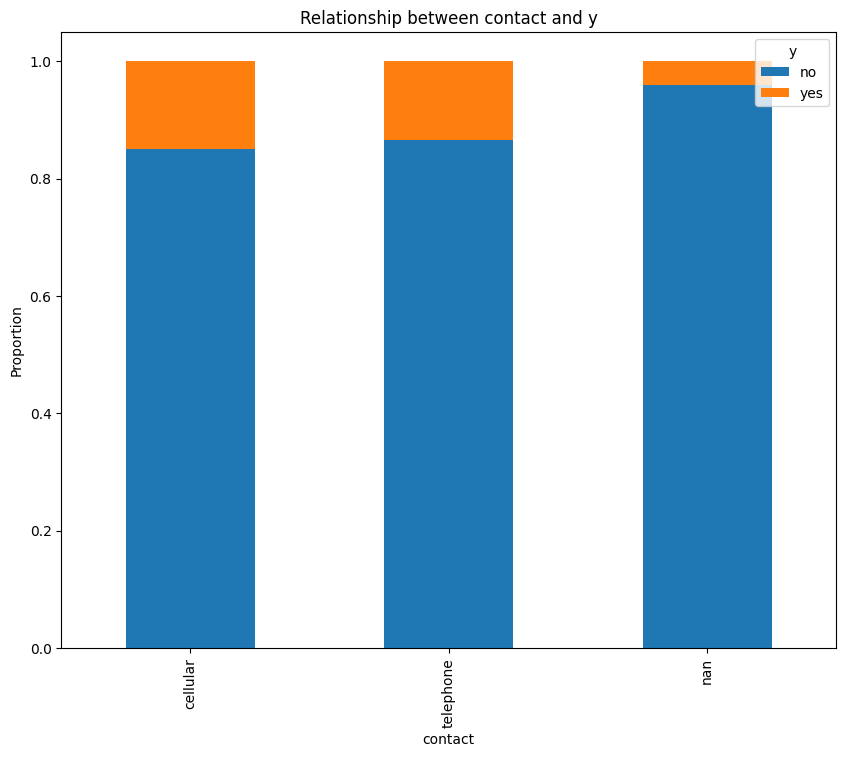

Cross tabulation of 'month' and 'y':
 y            no       yes
month                    
apr    0.803206  0.196794
aug    0.889867  0.110133
dec    0.532710  0.467290
feb    0.833522  0.166478
jan    0.898788  0.101212
jul    0.909065  0.090935
jun    0.897772  0.102228
mar    0.480084  0.519916
may    0.932805  0.067195
nov    0.898489  0.101511
oct    0.562331  0.437669
sep    0.535406  0.464594


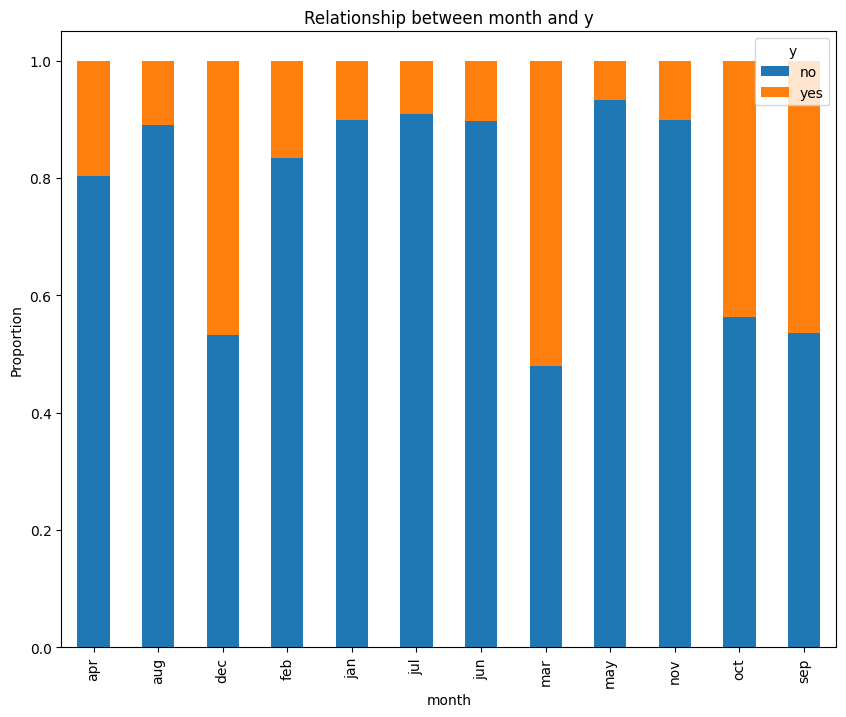

Cross tabulation of 'poutcome' and 'y':
 y               no       yes
poutcome                    
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253
NaN       0.908385  0.091615


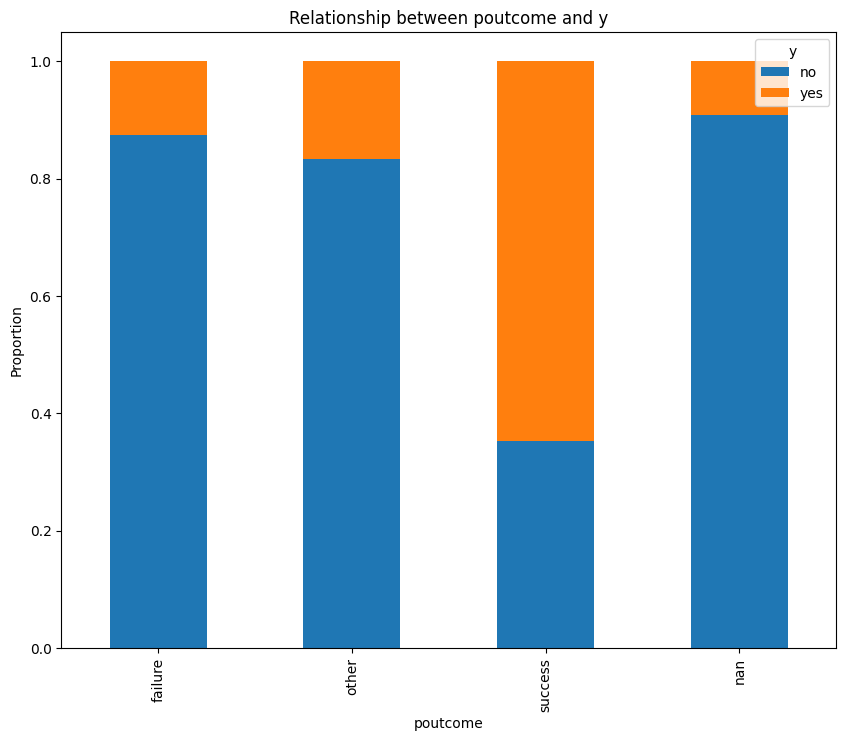

In [11]:


for column in categorical_columns:
  plot_relation_with_target(df,column,'y')

# Numerical Variable Exploration

##1.Numerical Distribution


In [12]:
def plot_numerical_distribution(data, column):
    """
    Plots the distribution of numerical variables.

    Parameters:
    data: The dataset (DataFrame)
    column: The numerical column (string)
    """
    plt.figure(figsize=(20, 10))  # Adjusted height for better aspect ratio

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, color='purple', bins=30, alpha=0.6)
    plt.title(f"Distribution of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
    plt.xlim(data[column].min(), data[column].max())  # Set x-axis limits

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f"Boxplot of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines
    plt.xlim(data[column].min(), data[column].max())  # Set x-axis limits

    # Annotate mean and median on the boxplot
    mean_value = data[column].mean()
    median_value = data[column].median()
    plt.axvline(mean_value, color='red', linestyle='--', label='Mean', linewidth=2)
    plt.axvline(median_value, color='green', linestyle='--', label='Median', linewidth=2)
    plt.legend()

    plt.tight_layout()
    plt.show()

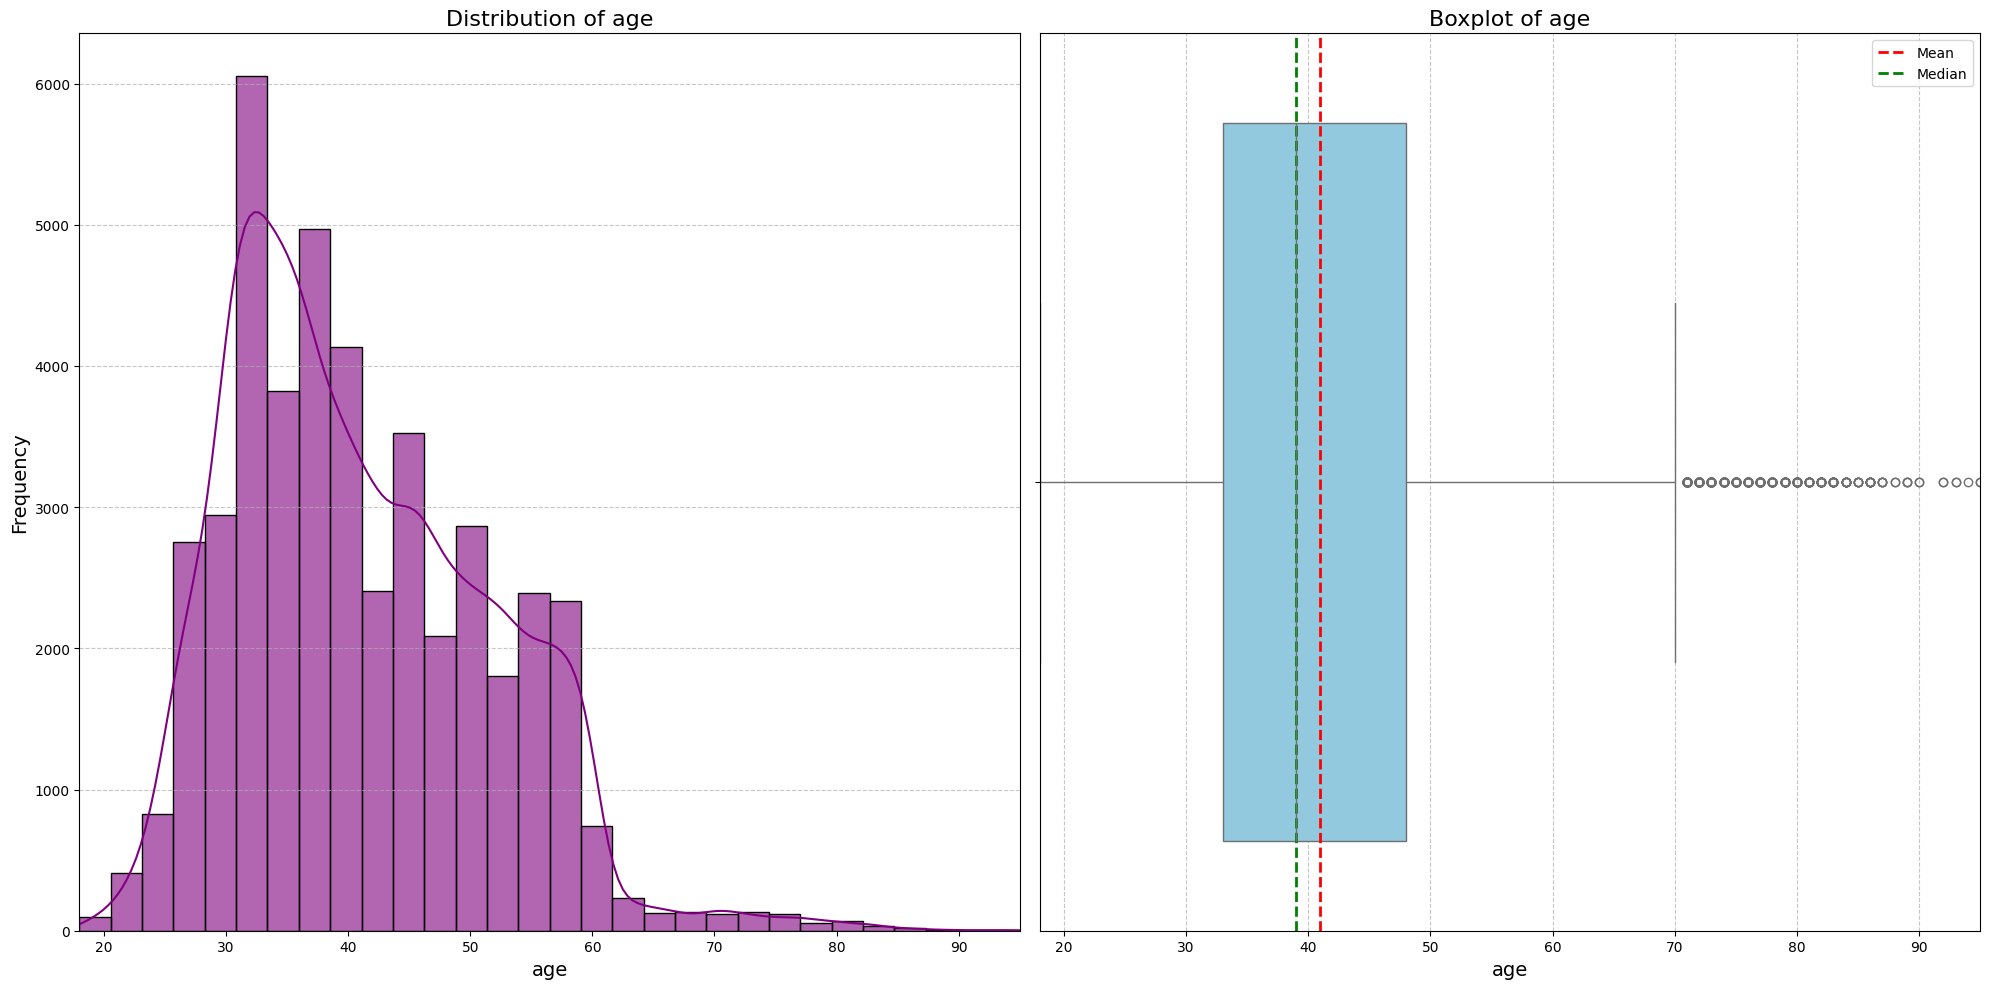

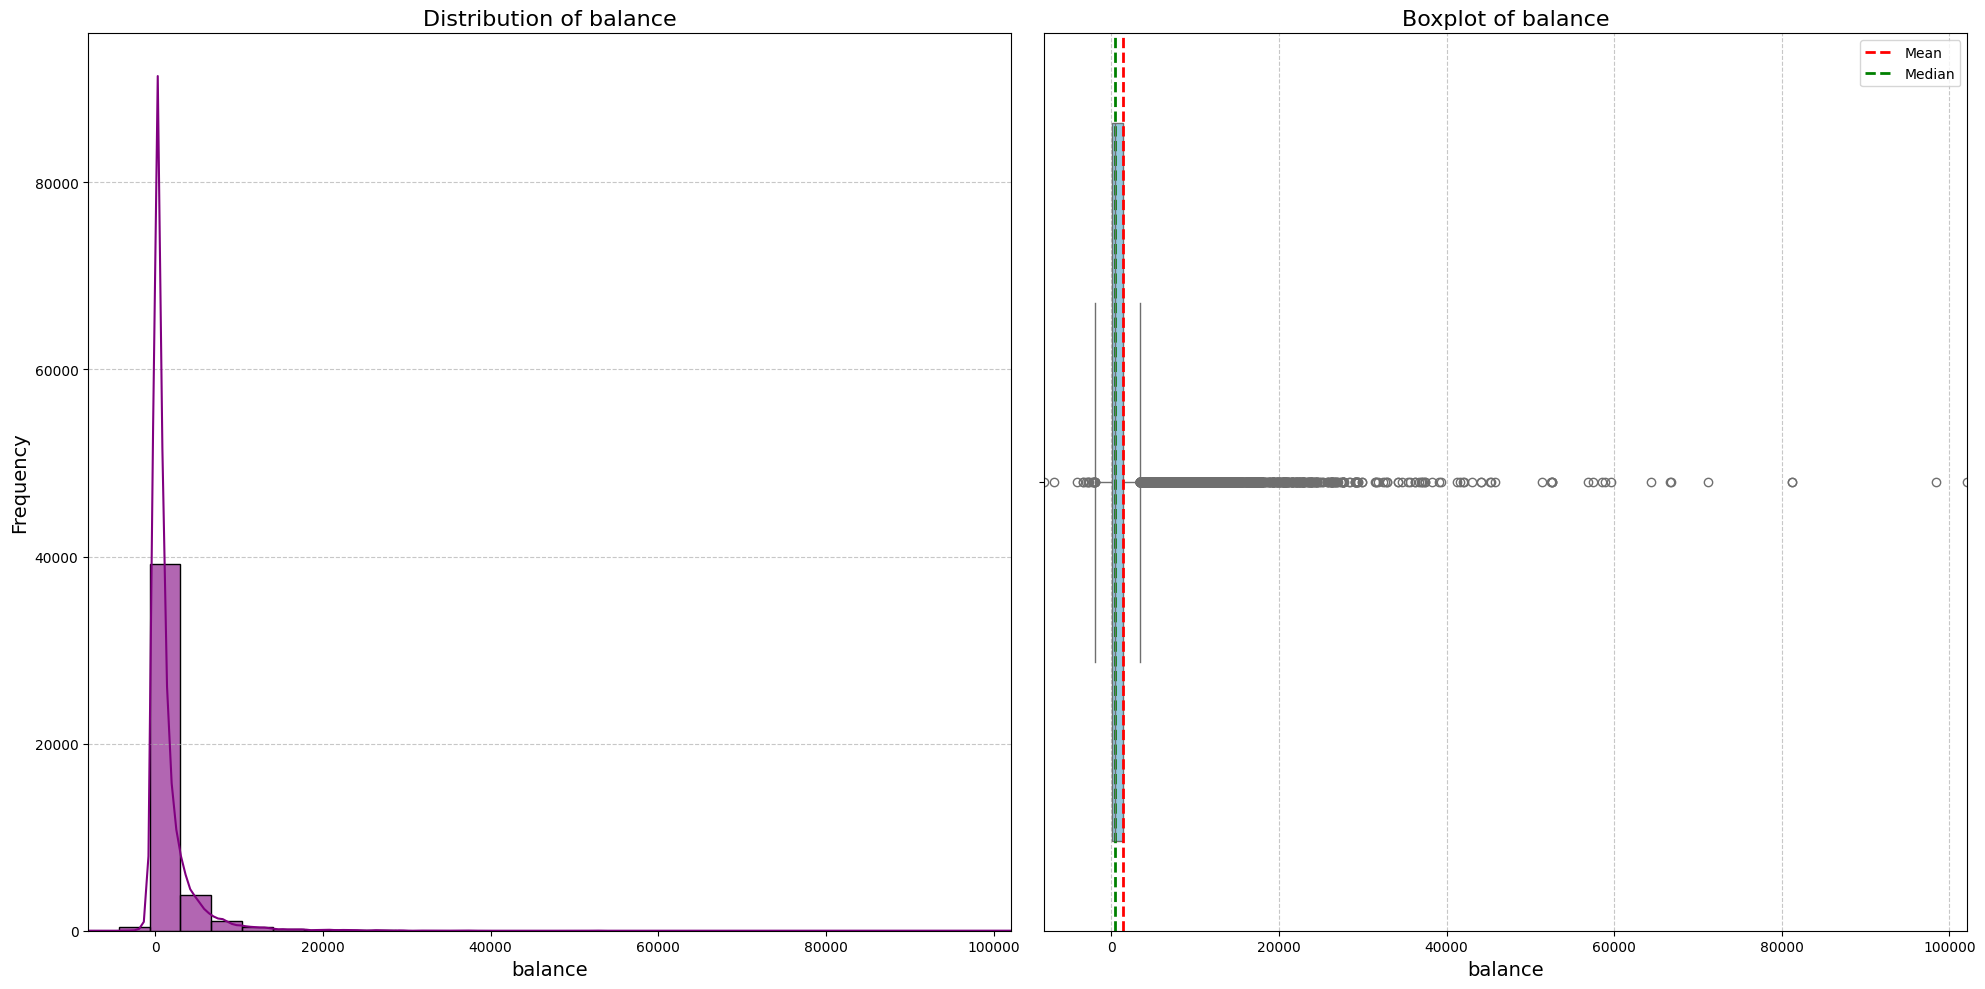

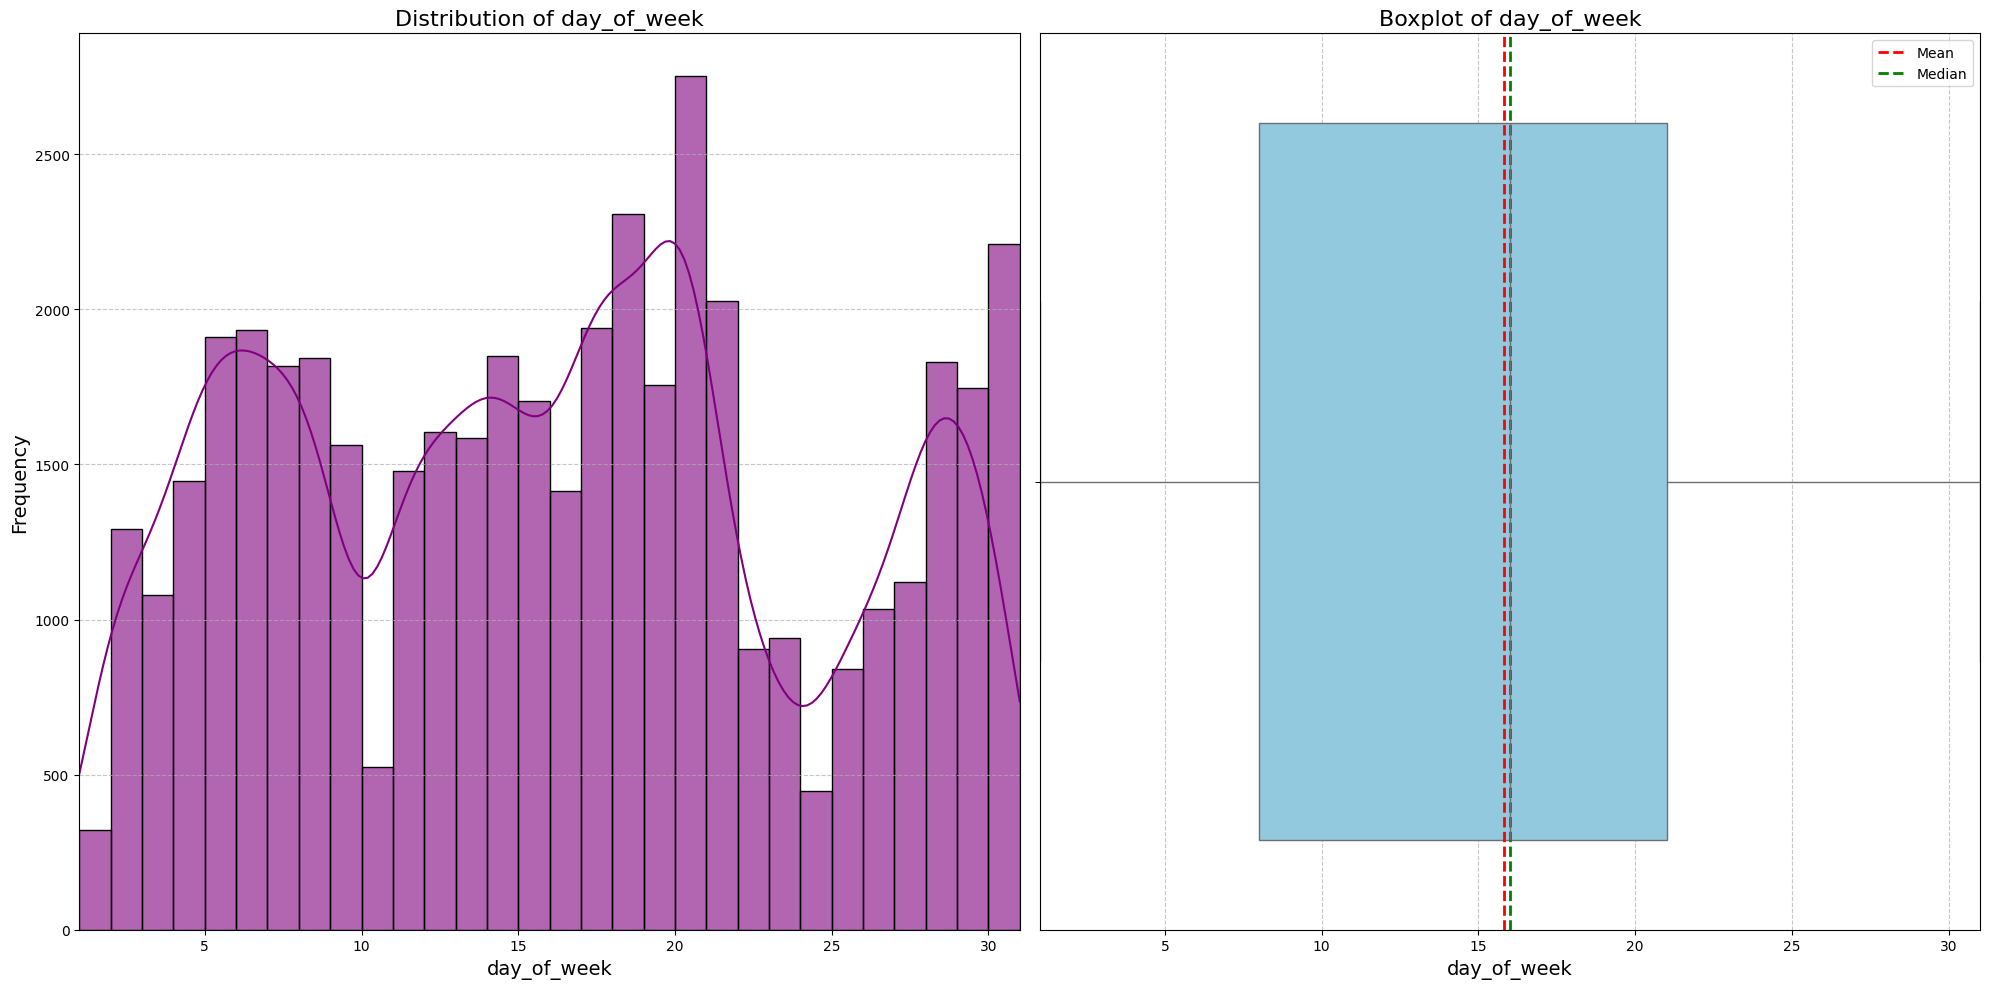

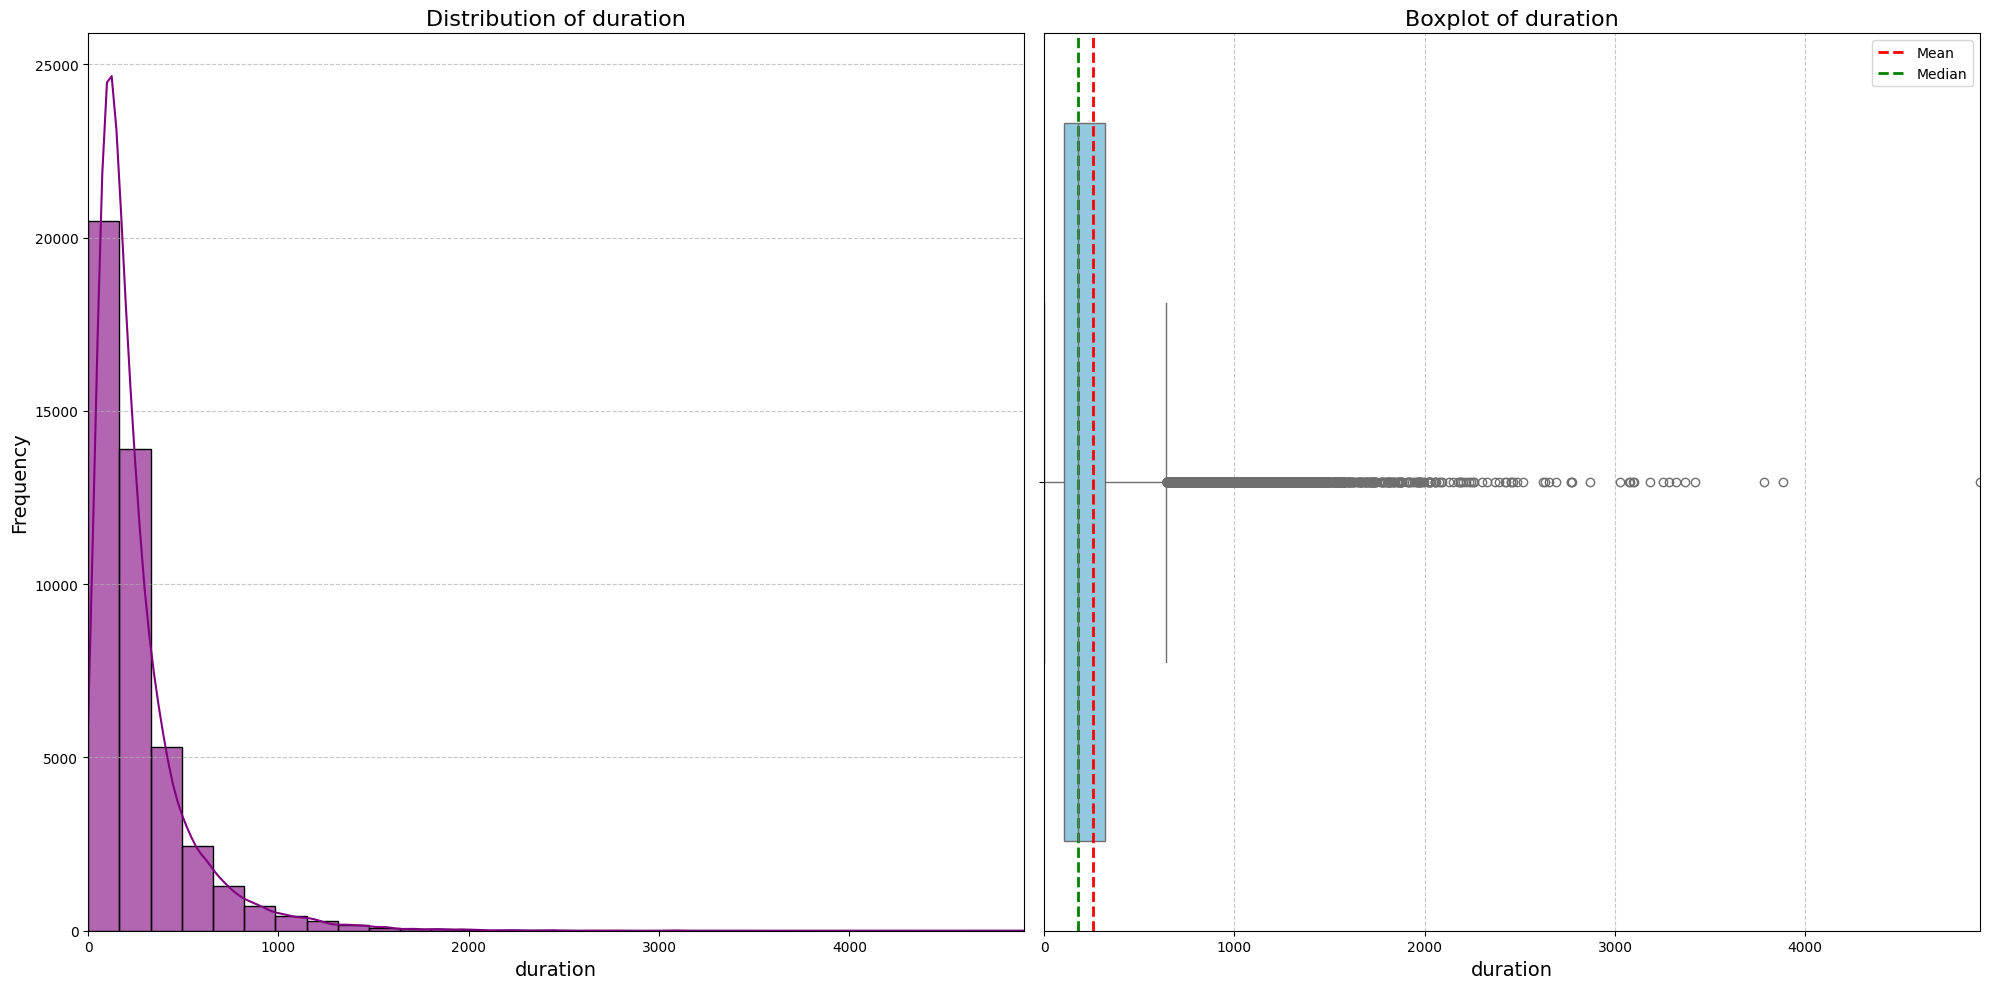

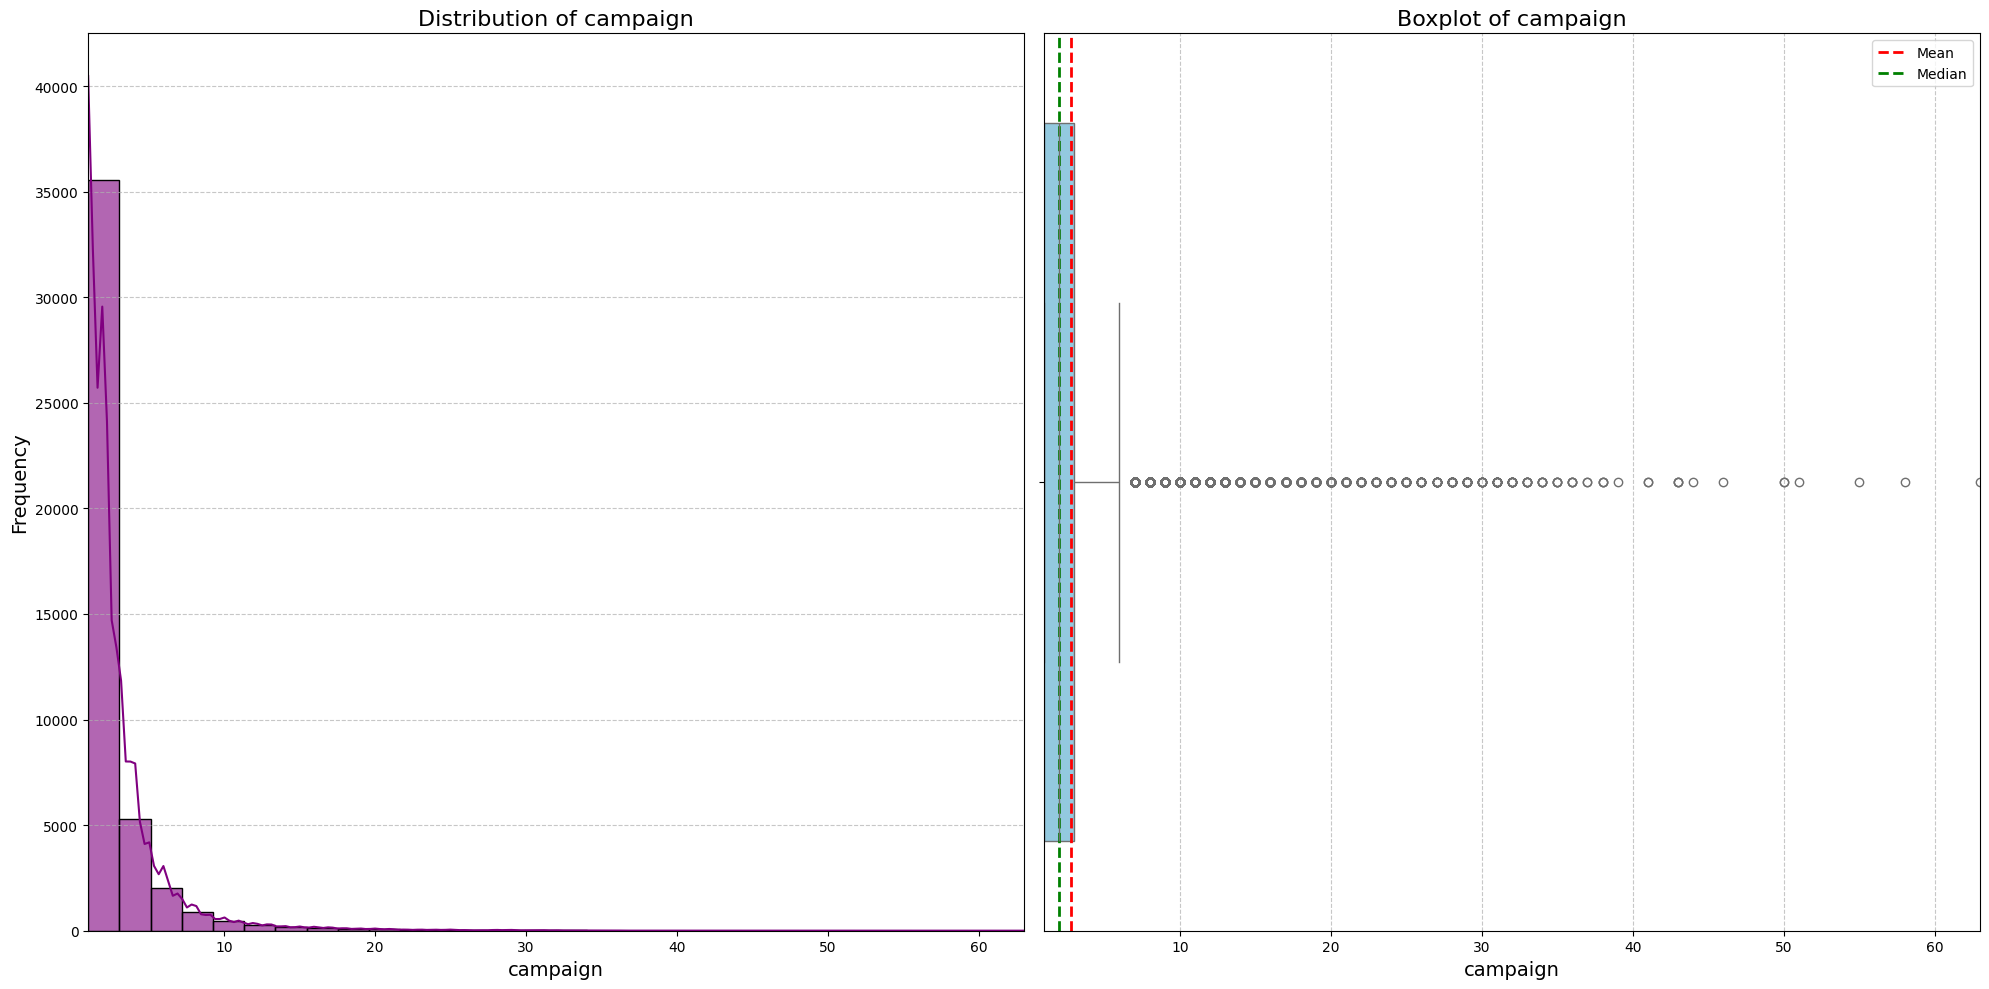

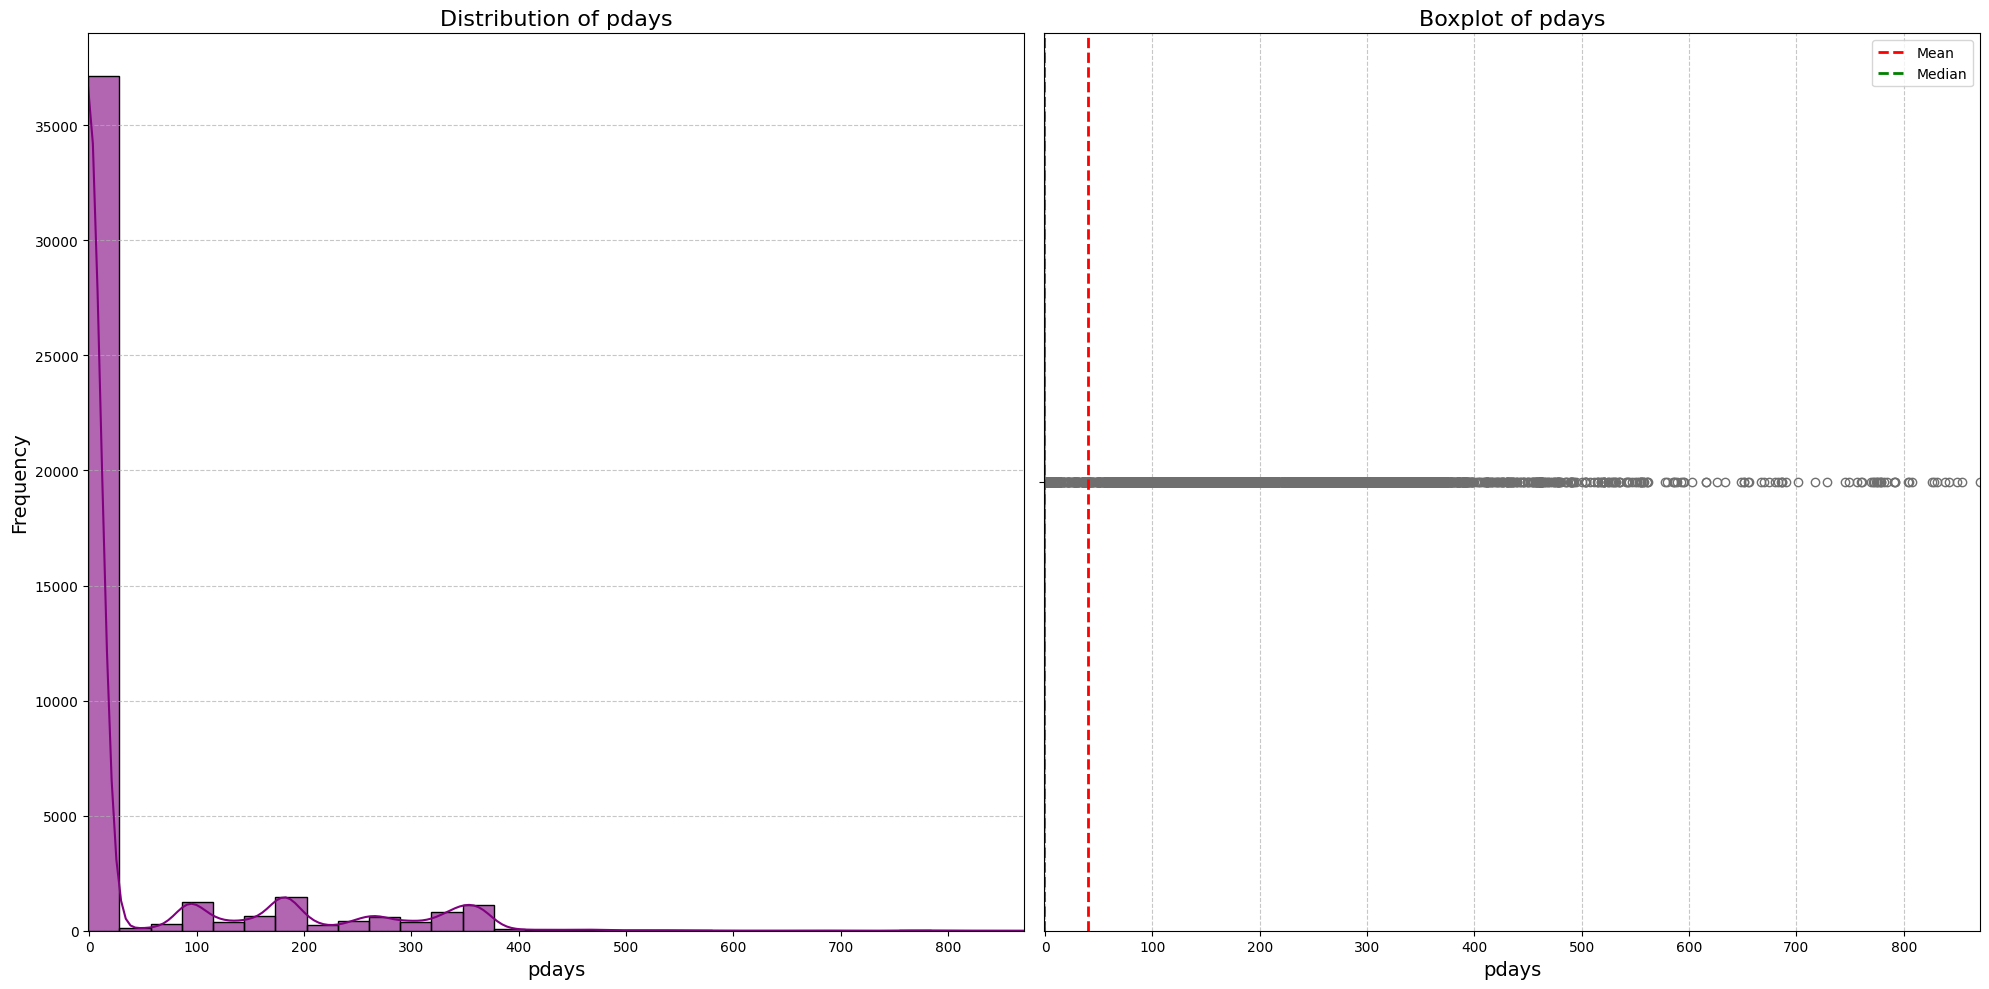

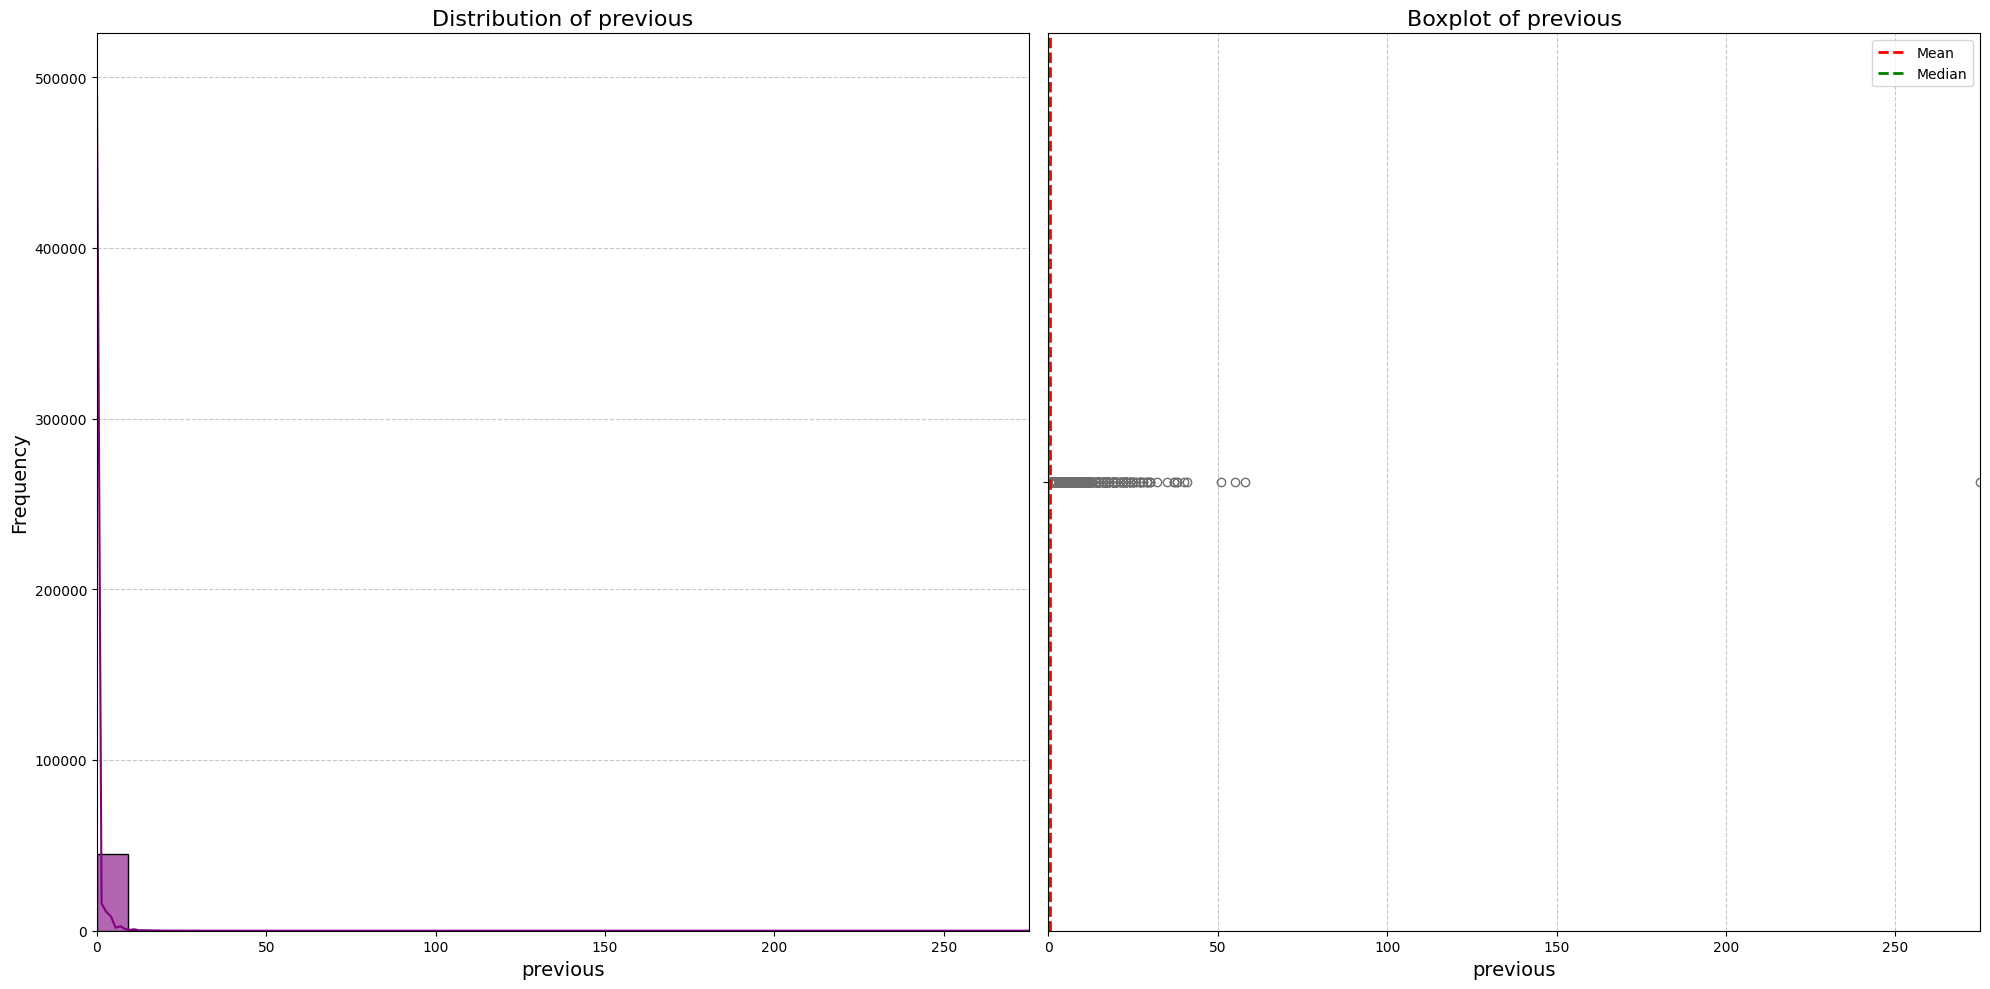

In [13]:
for column in numerical_columns:
  plot_numerical_distribution(X,column)

##Feature  Realationship

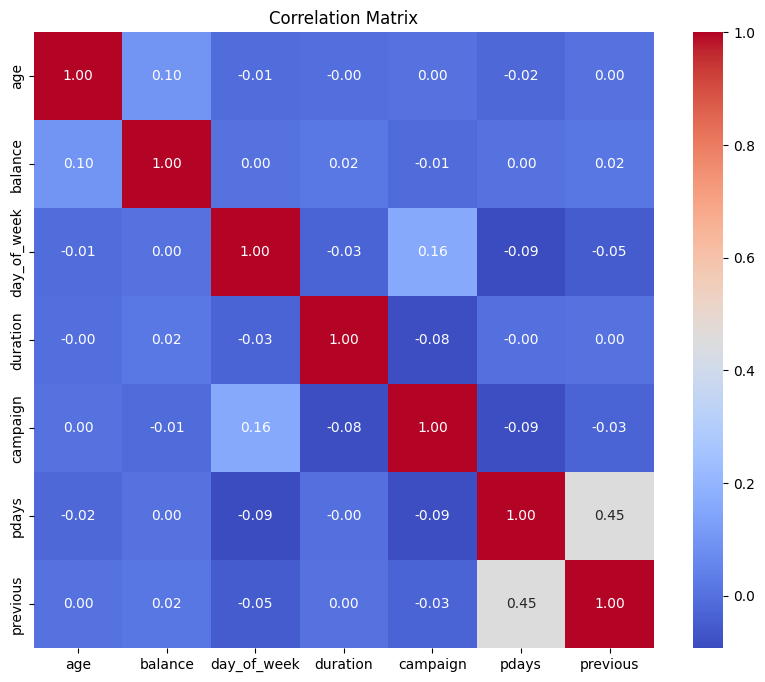

In [14]:
#correlation matrix

correlation_matrix=X.select_dtypes(include=["number"]).corr()

#heatmap to visualize correlation

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Relationship Between Numerical Features and Target

In [15]:
def plot_numerical_relation_with_target(data,column,target):
  """
  Plots the relationship between numerical features and the target variable.

  Parameters:
  data: The dataset (DataFrame)
  column: The numerical column (string)
  target: The target column (string)
  """
  #Checking column availability

  if column not in data.columns or target not in data.columns:
    print(f"Column does not exist in the dataset")

  plt.figure(figsize=(10,8))
  sns.boxplot(data=data, x=target ,y=column,palette="pastel")
  plt.title(f"Relationship between {column} and {target}")
  plt.xlabel(target)
  plt.ylabel(column)
  plt.show()

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


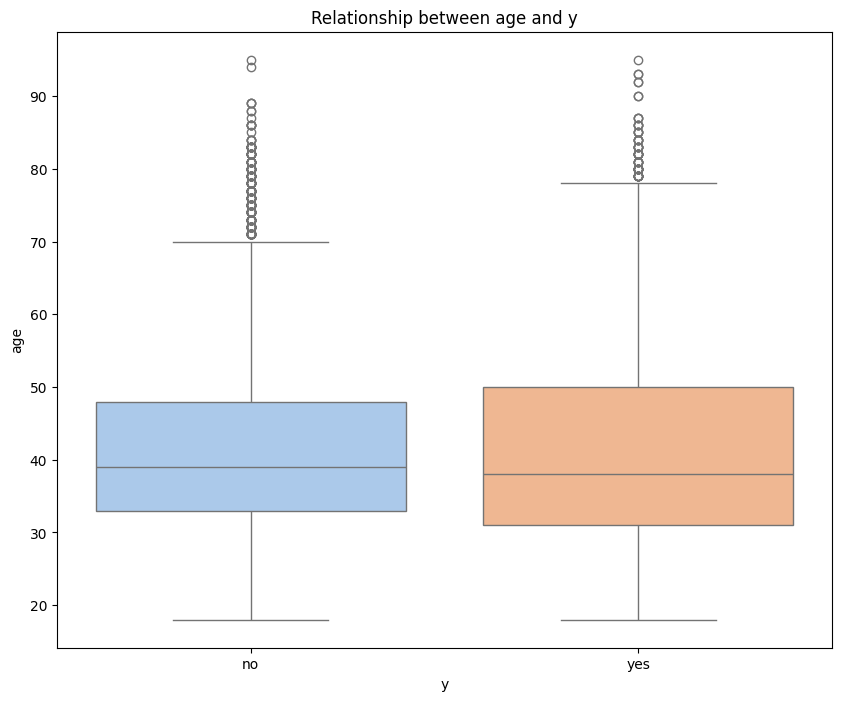

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


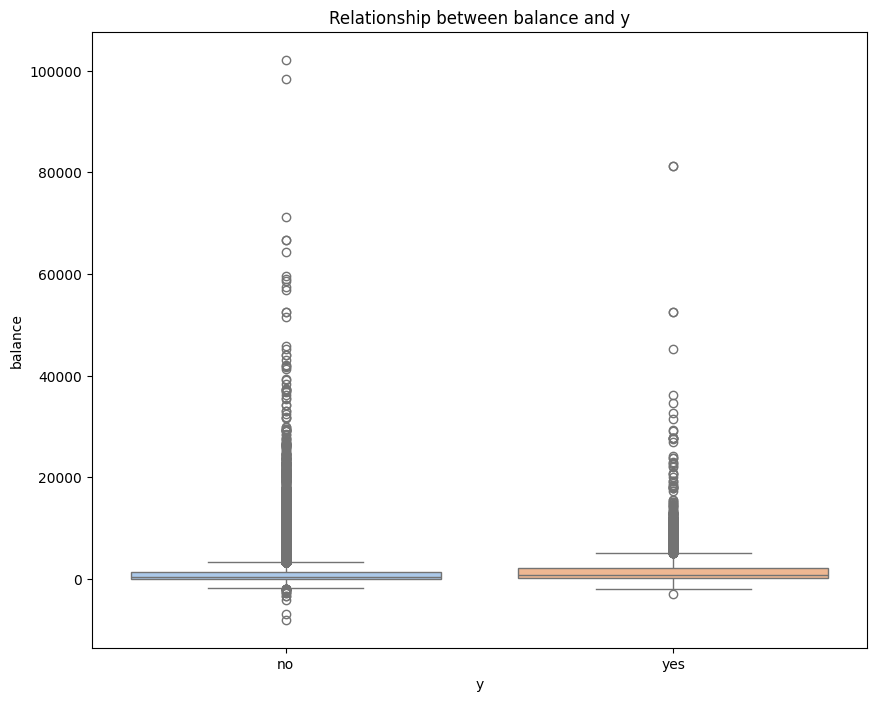

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


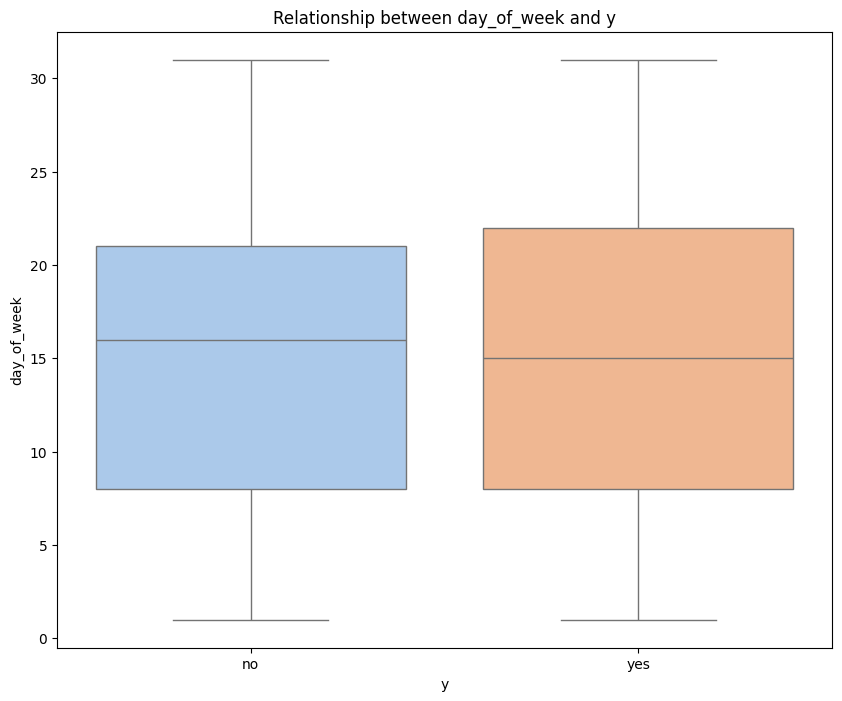

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


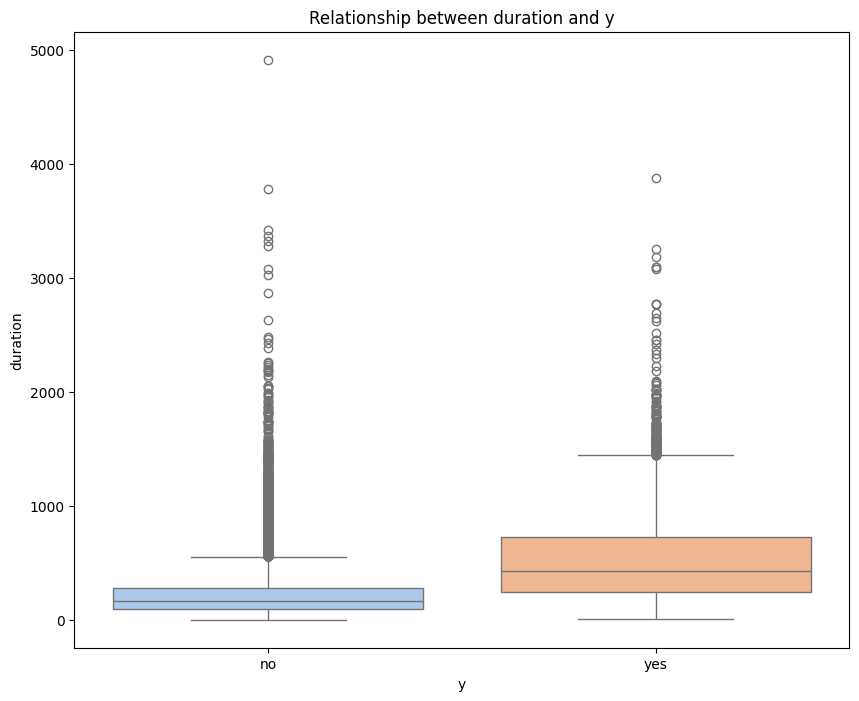

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


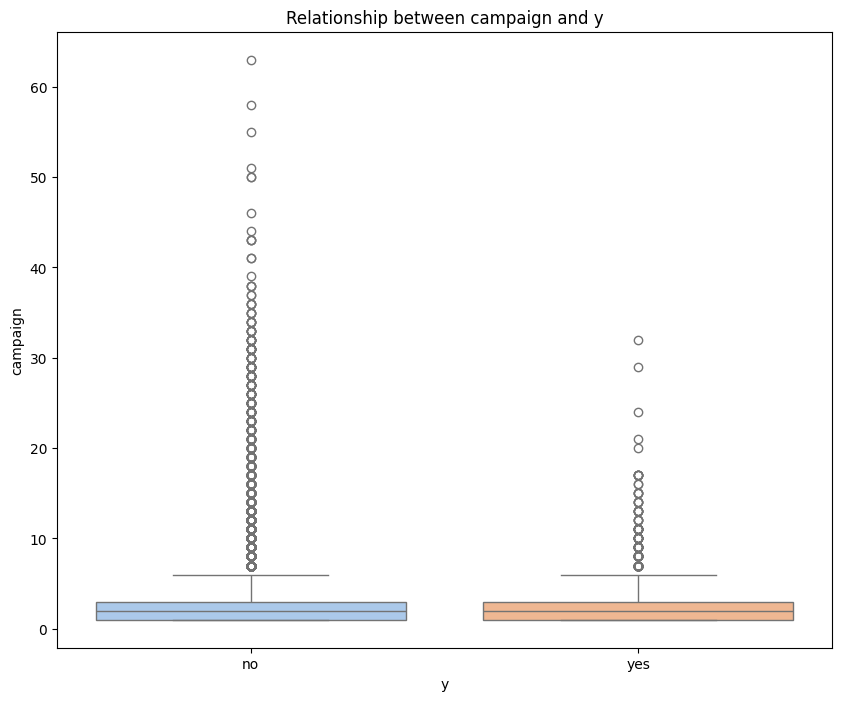

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


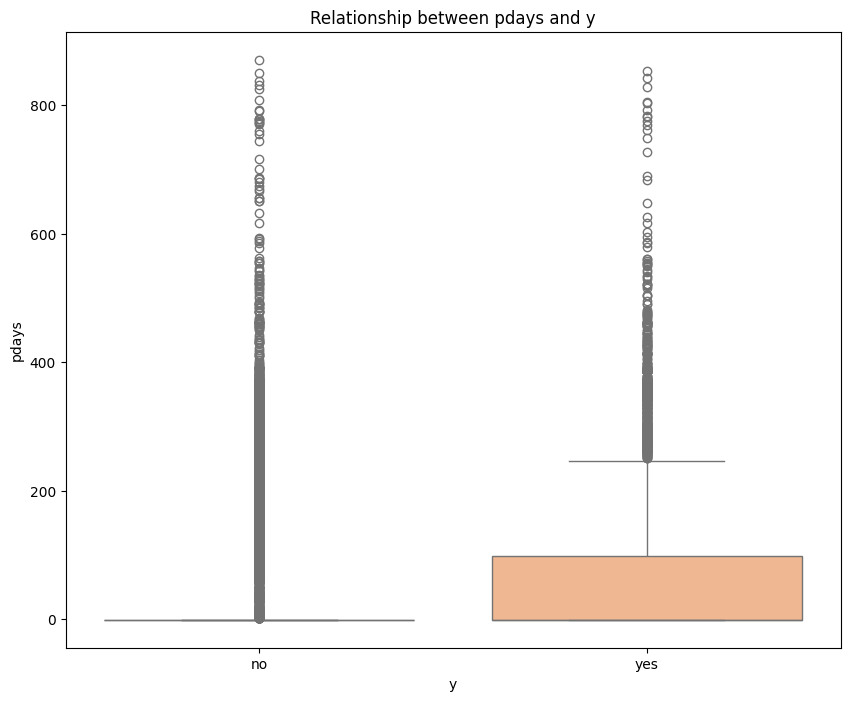

<ipython-input-15-9b6a652581a3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target ,y=column,palette="pastel")


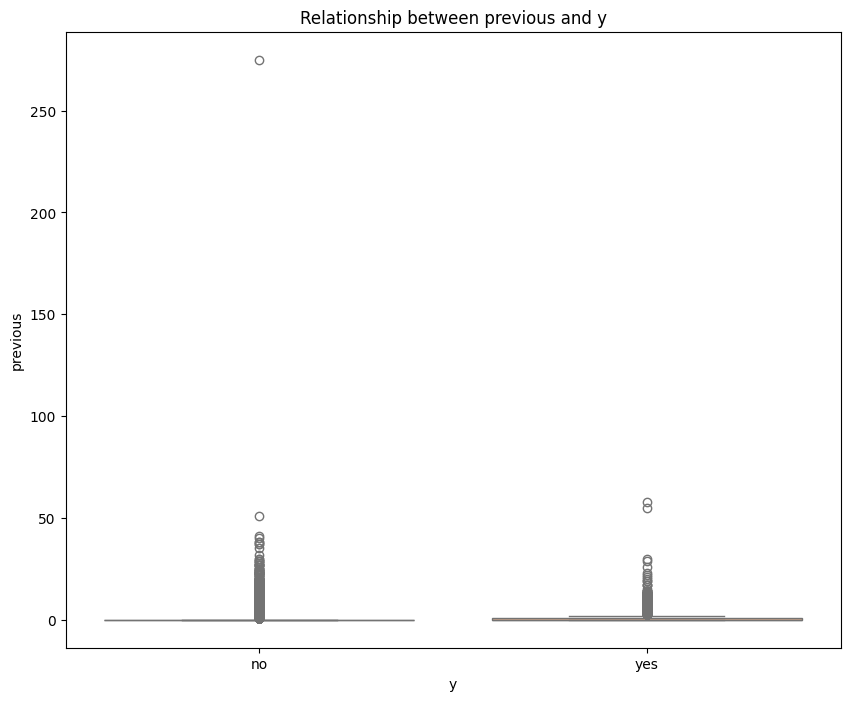

In [16]:
for column in numerical_columns:
  plot_numerical_relation_with_target(df,column,'y')

##Detect outliers

In [17]:
#IQR method for outliers

def detect_outliers_iqr(data, column):
  """
   To detect iqr outliers

   Parameters

  """
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)

  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
  print(f"Outliers Count: {((data[column] < lower_bound) | (data[column] > upper_bound)).sum()}")

In [18]:
for column in numerical_columns:
  detect_outliers_iqr(X,column)

age: Lower Bound = 10.5, Upper Bound = 70.5
Outliers Count: 487
balance: Lower Bound = -1962.0, Upper Bound = 3462.0
Outliers Count: 4729
day_of_week: Lower Bound = -11.5, Upper Bound = 40.5
Outliers Count: 0
duration: Lower Bound = -221.0, Upper Bound = 643.0
Outliers Count: 3235
campaign: Lower Bound = -2.0, Upper Bound = 6.0
Outliers Count: 3064
pdays: Lower Bound = -1.0, Upper Bound = -1.0
Outliers Count: 8257
previous: Lower Bound = 0.0, Upper Bound = 0.0
Outliers Count: 8257
